In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

%config InlineBackend.figure_format = 'retina'

In [220]:
stf = pd.read_csv('/Users/artyom/Downloads/Task from Avito.BI team/users_evaluation_of_satisfaction.csv')
stf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217533 entries, 0 to 217532
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   request_id                217414 non-null  object
 1   result_mentioned_by_user  217533 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [221]:
sup_t = pd.read_csv('/Users/artyom/Downloads/Task from Avito.BI team/support_tickets.csv')

In [222]:
sup_t = pd.merge(left=sup_t, right=stf, left_on='request_id', right_on='request_id', how='inner')
sup_t.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо
1,372 546 513,Технические вопросы,Загрузка фото,Решено,280bf0e6-6c0c-4eb1-b093-ac2eadd20cdb,2015-12-11 13:39:00,2015-12-16 05:20:00,Отлично
2,369 694 997,Технические вопросы,Доступ к сайту,Решено,045a97f4-4747-45e0-a3a9-441081e06c08,2015-12-17 22:46:00,2015-12-20 20:59:00,Отлично
3,3 254 820,Технические вопросы,Доступ к сайту,Решено,6d12e450-7aee-4842-b9cf-ee9a2824f892,2015-09-04 12:20:00,2015-09-05 10:02:00,Отлично
4,366 077 368,Технические вопросы,Доступ к сайту,Решено,f25c8846-9e55-4b15-9a27-6e24ca9e7922,2015-11-11 10:54:00,2015-11-14 08:53:00,Хорошо


Text(0.55, 0.88, 'Доля неудовлетворительных отзывов - 20.8%')

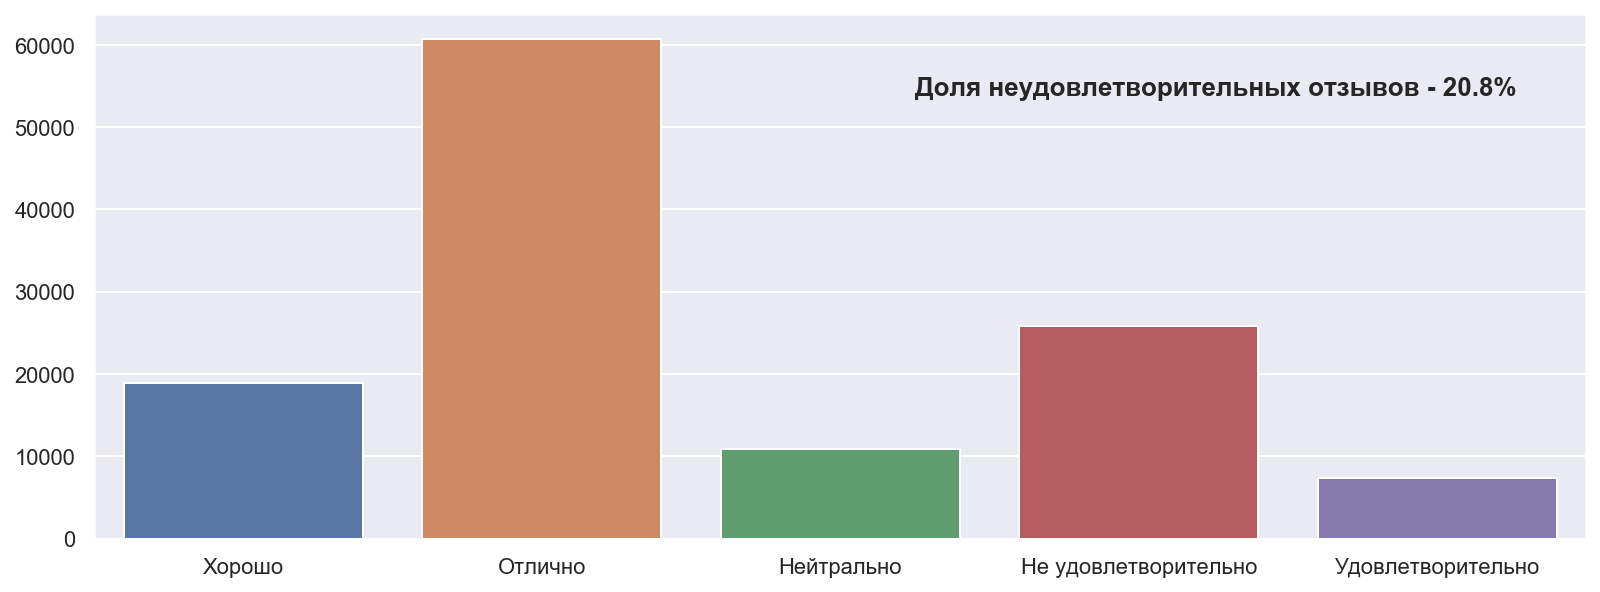

In [436]:
fig, ax = plt.subplots(figsize=(11, 4), constrained_layout=True)

chart = sns.countplot(x='result_mentioned_by_user', data=sup_t);
plt.xlabel(''), plt.ylabel('')
text = 'Доля неудовлетворительных отзывов - {:.1%}'.format(sup_t[sup_t['result_mentioned_by_user'] == 'Не удовлетворительно'].count()['user_id'] \
         / sup_t['result_mentioned_by_user'].count())
ax.text(0.55, 0.88, text, transform=ax.transAxes, fontsize=13, weight="bold", \
        verticalalignment='top')

In [224]:
from datetime import datetime
def srt_to_date(s):
     return datetime.strptime(s, '%Y-%m-%d %H:%M:%S')

def c_days(s):
     return s.days

In [225]:
sup_t['fact_reaction_dt'] = sup_t['fact_reaction_dt'].apply(srt_to_date)
sup_t['activity_start_dt'] = sup_t['activity_start_dt'].apply(srt_to_date)
sup_t['dist_to_react'] = (sup_t['fact_reaction_dt'] - sup_t['activity_start_dt']).apply(c_days)

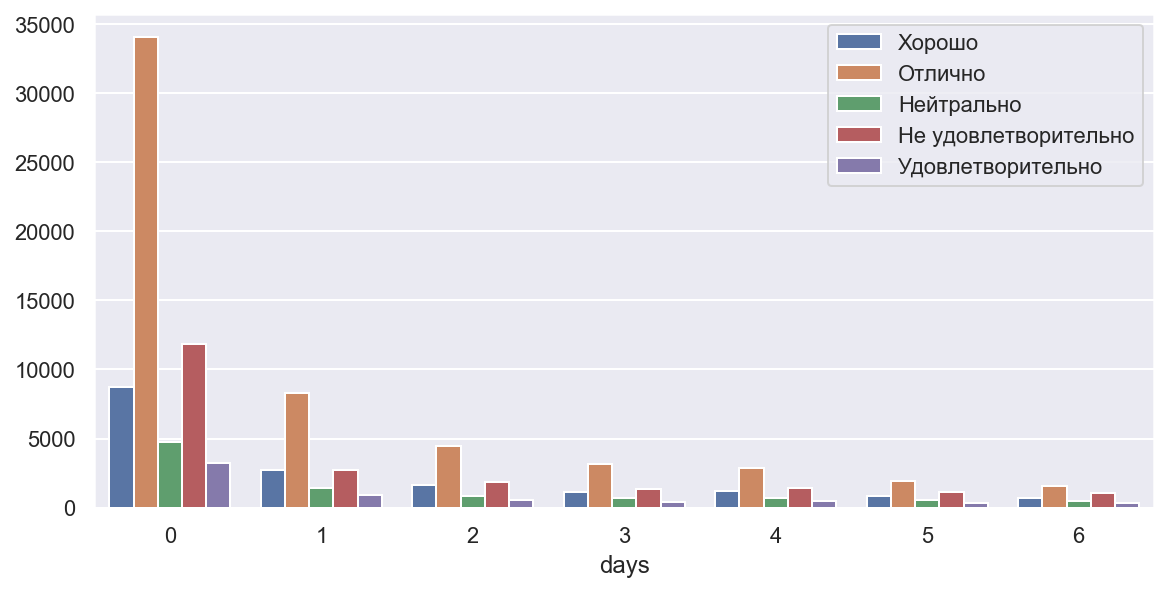

In [278]:
week = sup_t[(sup_t['dist_to_react'] >= 0) & (sup_t['dist_to_react'] <= 6)]

fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
chart = sns.countplot(x='dist_to_react', hue='result_mentioned_by_user', data=week);
plt.xlabel('days'), plt.ylabel('')
chart.legend(['Хорошо', 'Отлично', 'Нейтрально', 'Не удовлетворительно', 'Удовлетворительно'])

In [419]:
days = ['day ' + str(i) for i in range(1, 12)]

In [420]:
th_weeks = sup_t[(sup_t['dist_to_react'] >= 0) & (sup_t['dist_to_react'] <= 10)]

In [421]:
percent_not_stf = pd.DataFrame(index=days, columns=['percent', 'total_marks'])

for dist, day in enumerate(days):
    percent_not_stf.loc[day, 'percent'] = (th_weeks[(th_weeks['result_mentioned_by_user'] == 'Не удовлетворительно') & (th_weeks['dist_to_react'] == dist)] \
                                        ['result_mentioned_by_user'].count()) / \
                                        (th_weeks[(th_weeks['result_mentioned_by_user'] != 'Не удовлетворительно')  & (th_weeks['dist_to_react'] == dist)] \
                                        ['result_mentioned_by_user'].count()) * 100
    percent_not_stf.loc[day, 'total_marks'] = th_weeks[th_weeks['dist_to_react'] == dist]['result_mentioned_by_user'].count()

In [423]:
persent = percent_not_stf.reset_index()
persent['index'] = range(1, 12)
persent = persent.astype(float)

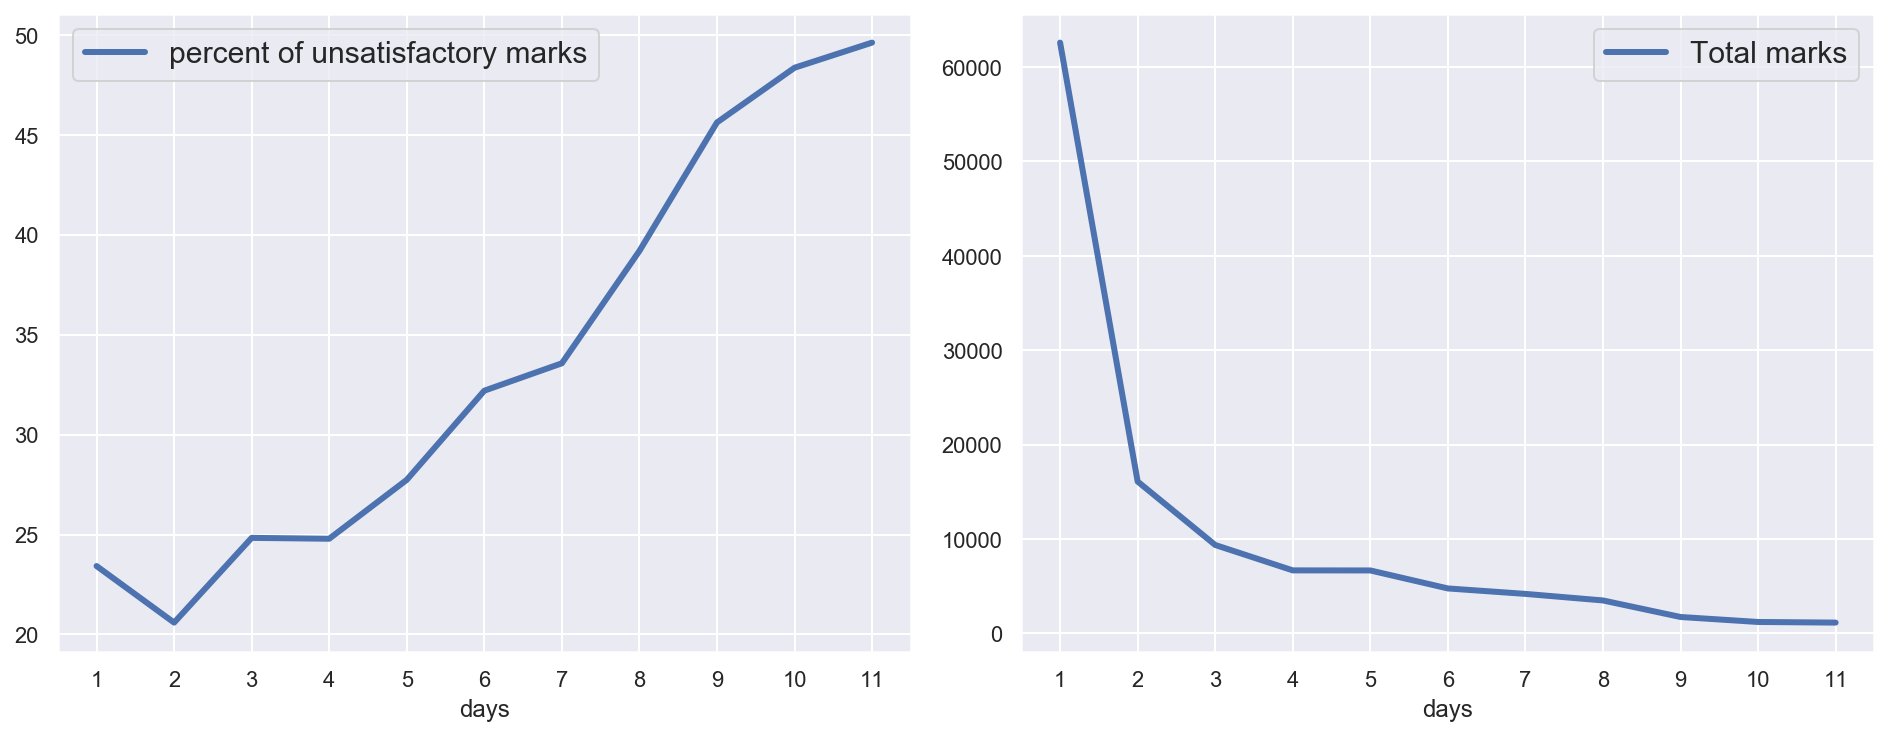

In [442]:
import matplotlib.ticker as ticker

fg = plt.figure(figsize=(13, 5), constrained_layout=True)
gs = fg.add_gridspec(1, 2)

fig_ax_1 = fg.add_subplot(gs[0, 0])
percent = sns.lineplot(x='index', y='percent', data=persent, linewidth=3)
plt.ylabel(''), plt.xlabel('days')
percent.legend(['percent of unsatisfactory marks'], loc=0, fontsize=15)
percent.xaxis.set_major_locator(ticker.MultipleLocator(1))
percent.yaxis.set_major_locator(ticker.MultipleLocator(5))


fig_ax_2 = fg.add_subplot(gs[0, 1])
total = sns.lineplot(x='index', y='total_marks', data=persent, linewidth=3)
plt.ylabel(''), plt.xlabel('days')
total.legend(['Total marks'], loc=0, fontsize=15)
total.xaxis.set_major_locator(ticker.MultipleLocator(1))

In [364]:
categories = sup_t['ticket_subcategory'].unique()
days = ['day ' + str(i) for i in range(1, 8)]

In [365]:
amount_anwers_per_days = pd.DataFrame(index=categories, columns=days)

for x in categories:
    for dist, day in enumerate(days):    
        amount_anwers_per_days.loc[x, day] = sup_t[(sup_t['ticket_subcategory'] == x) &
                      (sup_t['dist_to_react'] == dist)]['result_mentioned_by_user'].count()
        
amount_anwers_per_days = amount_anwers_per_days.astype(float)

In [366]:
uM_amount_anwers_per_days = amount_anwers_per_days[amount_anwers_per_days['day 1'] \
                                                   > amount_anwers_per_days['day 1'].mean()]

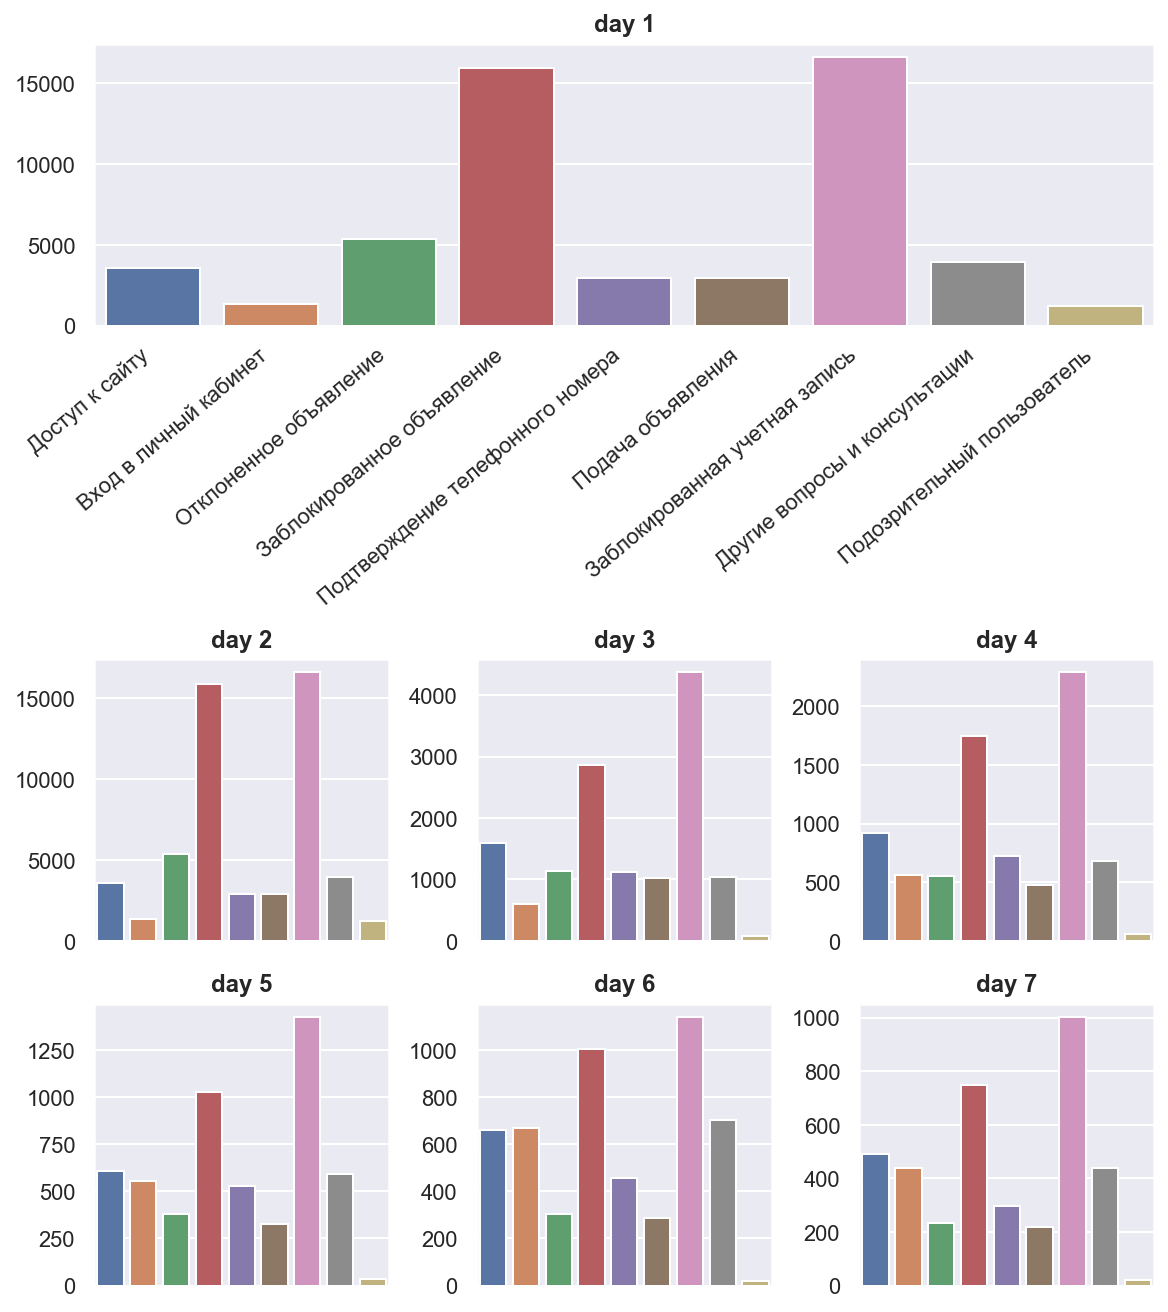

In [441]:
fg = plt.figure(figsize=(8, 9), constrained_layout=True)
gs = fg.add_gridspec(3, 3)
fig_ax_1 = fg.add_subplot(gs[0, :])
fig_ax_1.set_title('day 1', weight='bold')
chart = sns.barplot(uM_amount_anwers_per_days.index, uM_amount_anwers_per_days['day 1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.ylabel('')
for i in range(len(uM_amount_anwers_per_days.T.index)-1):
    fg.add_subplot(gs[int(i / 3) + 1, i % 3]).set_title('day {}'.format(i+2), weight='bold')
    chart = sns.barplot(uM_amount_anwers_per_days.index, uM_amount_anwers_per_days['day ' + str(i+1)])
    chart.set_xticklabels(''), plt.ylabel('')

[Text(0, 0.5, 'day 1'),
 Text(0, 1.5, 'day 2'),
 Text(0, 2.5, 'day 3'),
 Text(0, 3.5, 'day 4'),
 Text(0, 4.5, 'day 5'),
 Text(0, 5.5, 'day 6'),
 Text(0, 6.5, 'day 7')]

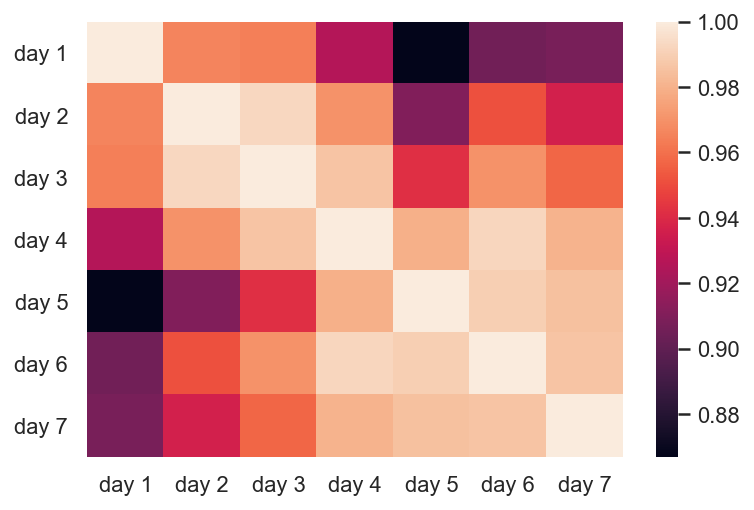

In [393]:
corr_matrix = amount_anwers_per_days.corr()
matrix_v = sns.heatmap(corr_matrix)
matrix_v.set_yticklabels(matrix_v.get_yticklabels(), rotation=0, horizontalalignment='right')

In [443]:
bad_mark_persantage = pd.DataFrame(index=categories, columns=['not_satisfaction_percent', 'all_marks', 'not_satisfaction_marks'])

for x in categories:
    all_marks = sup_t[sup_t['ticket_subcategory'] == x]['result_mentioned_by_user'].count()
    bad_marks = sup_t[(sup_t['ticket_subcategory'] == x) &
                      (sup_t['result_mentioned_by_user'] == 'Не удовлетворительно')]['result_mentioned_by_user'].count()
    bad_mark_persantage.loc[x, 'not_satisfaction_percent'] = bad_marks / all_marks
    bad_mark_persantage.loc[x, 'all_marks'] = all_marks
    bad_mark_persantage.loc[x, 'not_satisfaction_marks'] = bad_marks

In [444]:
sup_categories = bad_mark_persantage[bad_mark_persantage['all_marks'] >= bad_mark_persantage['all_marks'].mean()]
sup_categories = sup_categories[sup_categories['not_satisfaction_marks'] >= sup_categories['not_satisfaction_marks'].mean()]
sup_categories = sup_categories.sort_values('not_satisfaction_percent', ascending=False)
sup_categories

,not_satisfaction_percent,all_marks,not_satisfaction_marks
Отклоненное объявление,0.324224,8892,2883
Заблокированное объявление,0.310933,26443,8222
Заблокированная учетная запись,0.191669,30177,5784


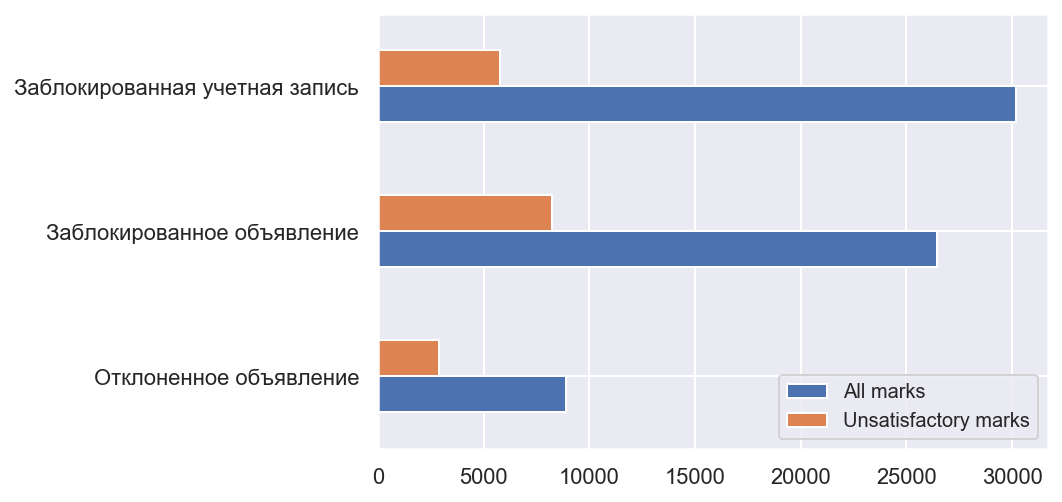

In [445]:
obs_cat = sup_categories[['all_marks', 'not_satisfaction_marks']].plot(kind='barh')
obs_cat.legend(['All marks', 'Unsatisfactory marks'], loc=4, fontsize=10)